In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
names = ['type','cap_shape','cap_surface','cap_color','bruises','odour','gill_attachment','gill_spacing','gill_size',\
         'gill_color','stalk_shape','stalk_root','stalk_sar','stalk_sbr','stalk_car','stalk_cbr','veil_type','veil_color',\
         'ring_no','ring_type','spore_print_col','population','habitat']
df = pd.read_csv('data.txt',header=None,names = names)
df.head()

,type,cap_shape,cap_surface,cap_color,bruises,odour,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_sbr,stalk_car,stalk_cbr,veil_type,veil_color,ring_no,ring_type,spore_print_col,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
lookup = []
for i in df.columns:
    names = df[i]
    l = {}
   
    if df[i].dtype == 'object':
        df[i] = pd.Categorical(df[i])
        df[i] = df[i].cat.codes
        
        for x in range(len(names)):
            if names[x] not in l:
                l[names[x]] = df[i][x]
            
        lookup.append(l)

print('Categories and their respective values:',lookup)

Categories and their respective values: [{'p': 1, 'e': 0}, {'x': 5, 'b': 0, 's': 4, 'f': 2, 'k': 3, 'c': 1}, {'s': 2, 'y': 3, 'f': 0, 'g': 1}, {'n': 4, 'y': 9, 'w': 8, 'g': 3, 'e': 2, 'p': 5, 'b': 0, 'u': 7, 'c': 1, 'r': 6}, {'t': 1, 'f': 0}, {'p': 6, 'a': 0, 'l': 3, 'n': 5, 'f': 2, 'c': 1, 'y': 8, 's': 7, 'm': 4}, {'f': 1, 'a': 0}, {'c': 0, 'w': 1}, {'n': 1, 'b': 0}, {'k': 4, 'n': 5, 'g': 2, 'p': 7, 'w': 10, 'h': 3, 'u': 9, 'e': 1, 'b': 0, 'r': 8, 'y': 11, 'o': 6}, {'e': 0, 't': 1}, {'e': 3, 'c': 2, 'b': 1, 'r': 4, '?': 0}, {'s': 2, 'f': 0, 'k': 1, 'y': 3}, {'s': 2, 'f': 0, 'y': 3, 'k': 1}, {'w': 7, 'g': 3, 'p': 6, 'n': 4, 'b': 0, 'e': 2, 'o': 5, 'c': 1, 'y': 8}, {'w': 7, 'p': 6, 'g': 3, 'b': 0, 'n': 4, 'e': 2, 'y': 8, 'o': 5, 'c': 1}, {'p': 0}, {'w': 2, 'n': 0, 'o': 1, 'y': 3}, {'o': 1, 't': 2, 'n': 0}, {'p': 4, 'e': 0, 'l': 2, 'f': 1, 'n': 3}, {'k': 2, 'n': 3, 'u': 6, 'h': 1, 'w': 7, 'r': 5, 'o': 4, 'y': 8, 'b': 0}, {'s': 3, 'n': 2, 'a': 0, 'v': 4, 'y': 5, 'c': 1}, {'u': 5, 'g': 1, 

In [5]:
X = df.drop('type',axis=1)
print('Feature Variable Dimension:',X.shape)
y = df.type
print('Target Variable Dimension:',y.shape)

Feature Variable Dimension: (8124, 22)
Target Variable Dimension: (8124,)


<h1>Performing Principal Components Analysis 

It is observed that reducing the Feature dimensions form 22 to 12 does not has a huge impact on the Classifier Accuracy. The details regading performance of the clasifier before and after PCA have been explained in the accompanied text file. 

[ 0.34  0.51  0.63  0.7   0.76  0.81  0.86  0.9   0.94  0.97  0.99  1.  ]
[ 0.33758733  0.16581098  0.12285821  0.06796611  0.05831173  0.05092539
  0.04670841  0.03908416  0.03577877  0.02591613  0.01995434  0.01029534]


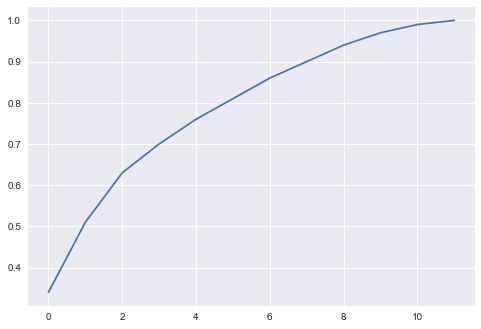

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12) 

pca.fit(X) 
X = pca.transform(X)

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=2))
print (var)
print(pca.explained_variance_ratio_)

plt.plot(var)
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)
print('X Train:',X_train.shape)
print('X Test:',X_test.shape)
print('Y Train:',Y_train.shape)
print('Y Test:',Y_test.shape)

X Train: (6093, 12)
X Test: (2031, 12)
Y Train: (6093,)
Y Test: (2031,)


<h1>KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', n_jobs=-1)

knn_model = knn.fit(X_train, Y_train)
knn_predict = knn.predict(X_test)

print ('KNN Accuracy with default parameters:',metrics.accuracy_score(knn_predict, Y_test)*100,'%')

KNN Accuracy with default parameters: 99.9507631709 %


In [9]:
# Relevant Metrics
print('AUC ROC Score for KNN Classifier:',roc_auc_score(Y_test,knn_predict))

print('Confusion Matrix:','\n',confusion_matrix(Y_test,knn_predict))

print('Classification Report:','\n',classification_report(Y_test,knn_predict))

AUC ROC Score for KNN Classifier: 0.999511241447
Confusion Matrix: 
 [[1022    1]
 [   0 1008]]
Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      1023
          1       1.00      1.00      1.00      1008

avg / total       1.00      1.00      1.00      2031



<h1> Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=10)
lr_model = lr.fit(X_train, Y_train)
lr_predict = lr.predict(X_test)

print ('Logistic Regression Accuracy with default parameters:',metrics.accuracy_score(lr_predict, Y_test)*100,'%')

Logistic Regression Accuracy with default parameters: 88.6262924668 %


In [11]:
print('AUC ROC Score for Logistic Regression:',roc_auc_score(Y_test,lr_predict))

print('Confusion Matrix:','\n',confusion_matrix(Y_test,lr_predict))

print('Classification Report:',classification_report(Y_test,lr_predict))

AUC ROC Score for Logistic Regression: 0.885998522087
Confusion Matrix: 
 [[943  80]
 [151 857]]
Classification Report:              precision    recall  f1-score   support

          0       0.86      0.92      0.89      1023
          1       0.91      0.85      0.88      1008

avg / total       0.89      0.89      0.89      2031



<h1> Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=10)
dtc_model = dtc.fit(X_train, Y_train)
dtc_predict = dtc.predict(X_test)

print ('Decision Tree Accuracy with default parameters:',metrics.accuracy_score(dtc_predict, Y_test)*100,'%')

Decision Tree Accuracy with default parameters: 99.3599212211 %


In [13]:
print('AUC ROC Score for Decision Tree:',roc_auc_score(Y_test,dtc_predict))

print('Confusion Matrix:','\n',confusion_matrix(Y_test,dtc_predict))

print('Classification Report:',classification_report(Y_test,dtc_predict))

AUC ROC Score for Decision Tree: 0.993580680073
Confusion Matrix: 
 [[1019    4]
 [   9  999]]
Classification Report:              precision    recall  f1-score   support

          0       0.99      1.00      0.99      1023
          1       1.00      0.99      0.99      1008

avg / total       0.99      0.99      0.99      2031



<h1>Support Vector Classifier

In [14]:
from sklearn.svm import SVC
svc = SVC(random_state=12)
svc_model = svc.fit(X_train, Y_train)
svc_predict = svc.predict(X_test)

print ('Support Vector Classifier Accuracy with default parameters:',metrics.accuracy_score(svc_predict, Y_test)*100,'%')


Support Vector Classifier Accuracy with default parameters: 100.0 %


In [15]:
print('AUC ROC Score for Support Vector Classifier:',roc_auc_score(Y_test,svc_predict))

print('Confusion Matrix:','\n',confusion_matrix(Y_test,svc_predict))

print('Classification Report:','\n',classification_report(Y_test,svc_predict))

AUC ROC Score for Support Vector Classifier: 1.0
Confusion Matrix: 
 [[1023    0]
 [   0 1008]]
Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      1023
          1       1.00      1.00      1.00      1008

avg / total       1.00      1.00      1.00      2031

